##Training a model that predicts the housing prices in Tashkent city

##We use CRISP methodology for our model training

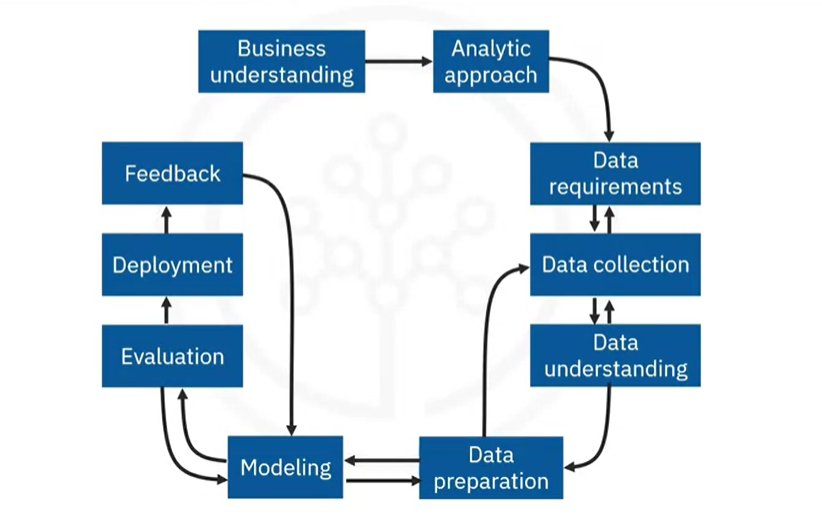

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [ ]:
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


In [ ]:
df['price'] = df['price'].replace({'Договорная':np.nan}).astype(float)
df['size'] = df['size'].replace({'Площадьземли:1сот':np.nan}).astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7564 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7466 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 413.8+ KB


In [ ]:
df.isnull().sum()

location       0
district       0
rooms          0
size           1
level          0
max_levels     0
price         99
dtype: int64

In [ ]:
def fill_size_by_rooms(df):
  nan_rows = df[pd.isna(df['size'])].index
  mean_size = df.groupby('size')['size'].mean()
  for row in nan_rows:
    num_rooms = df.at[row, 'rooms']
    df.at[row, 'size'] = mean_size.get(num_rooms)

fill_size_by_rooms(df)

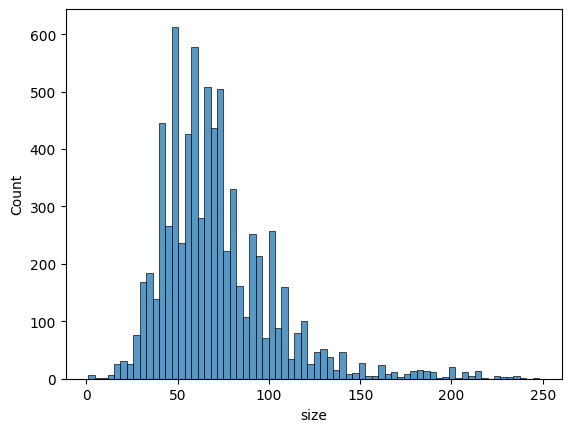

In [ ]:
df = df[df['size']<250] #filtr
sns.histplot(data=df, x='size')
plt.show()

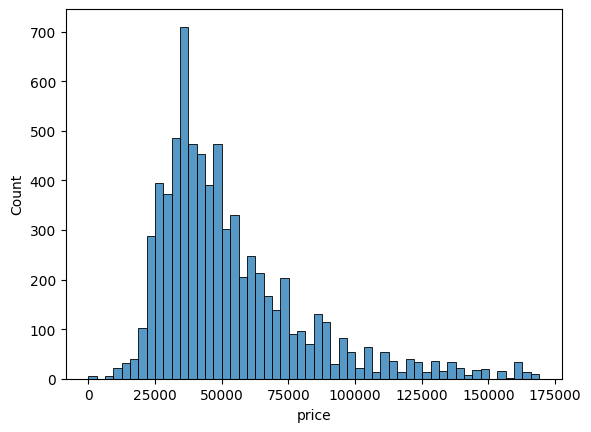

In [ ]:
df = df[df['price']<170000] #filtr
sns.histplot(data=df, x='price')
plt.show()

In [ ]:
def price_mean_less_rooms(df):
  filtered_rows = df[df['price'] < 15000]
  mean_price = df.groupby('rooms')['price'].mean()
  for index, row in filtered_rows.iterrows():
    num_rooms = row['rooms']
    df.at[index, 'price'] = mean_price.get(num_rooms)

def fill_price_by_num_rooms(df):
  nan_rows = df[pd.isna(df['price'])].index
  mean_prices = df.groupby('rooms')['price'].mean()
  for row in nan_rows:
    num_rooms = df.at[row, 'rooms']
    df.at[row, 'price'] = mean_prices.get(num_rooms)

price_mean_less_rooms(df)
fill_size_by_rooms(df)

In [ ]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rooms,size,level,max_levels,price
rooms,1.000000,0.822123,0.147624,0.175707,0.609214
size,0.822123,1.000000,0.201799,0.312185,0.773119
level,0.147624,0.201799,1.000000,0.595473,0.080047
max_levels,0.175707,0.312185,0.595473,1.000000,0.258948
price,0.609214,0.773119,0.080047,0.258948,1.000000


<ipython-input-13-eba764e1f4fe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrltn = df.corr()


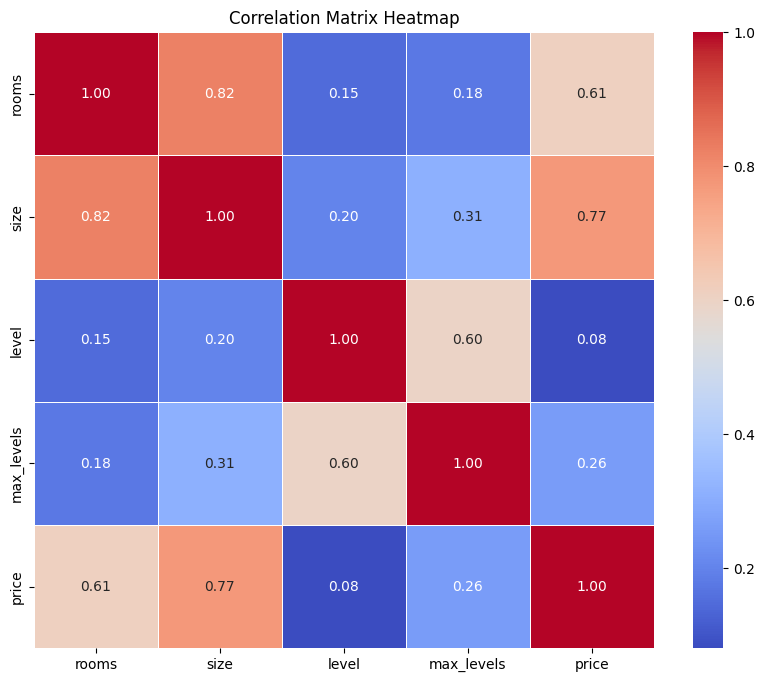

In [ ]:
corrltn = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corrltn, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df = df.drop('location', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_set.drop('price', axis=1)
y = train_set['price'].copy()

X_num = X_train.drop('district', axis=1)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [ ]:
X_prepared = full_pipeline.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_prepared, y)

LinearRegression()

In [ ]:
test_data = X_train.sample(10)
test_data

,district,rooms,size,level,max_levels
1485,Мирзо-Улугбекский,2,64.0,6,7
221,Яккасарайский,2,89.0,4,12
5513,Чиланзарский,3,67.0,4,4
2616,Учтепинский,4,85.0,3,5
747,Яшнободский,2,30.0,7,9
5482,Шайхантахурский,5,120.0,3,4
3046,Юнусабадский,3,110.0,3,7
6891,Учтепинский,4,76.0,1,5
7217,Чиланзарский,1,30.0,2,5
6940,Чиланзарский,2,50.0,1,4


In [ ]:
test_label = y.loc[test_data.index]
test_label

1485     45000.0
221      81772.0
5513     34500.0
2616     63000.0
747      20900.0
5482     75000.0
3046    110000.0
6891    120000.0
7217     20200.0
6940     34000.0
Name: price, dtype: float64

In [ ]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[-0.55306986, -0.19089843,  1.03881103,  0.39610362,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.55306986,  0.70192302,  0.13905222,  2.33770909,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.41610009, -0.08375986,  0.13905222, -0.76885967,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.38527003,  0.55907159, -0.31082718, -0.38053857,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.55306986, -1.4051356 ,  1

In [ ]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([46619.35947627, 78288.50210048, 46502.29694014, 58580.33436978,
       16488.25156981, 90866.8794074 , 85363.93684114, 55211.23760092,
       24491.06615197, 39668.46129864])

In [ ]:
pd.DataFrame({'Predicted price':predicted_data, 'Actual price': test_label})

,Predicted price,Actual price
1485,46619.359476,45000.0
221,78288.502100,81772.0
5513,46502.296940,34500.0
2616,58580.334370,63000.0
747,16488.251570,20900.0
5482,90866.879407,75000.0
3046,85363.936841,110000.0
6891,55211.237601,120000.0
7217,24491.066152,20200.0
6940,39668.461299,34000.0


In [ ]:
X_test = test_set.drop('price', axis=1)
X_test

,district,rooms,size,level,max_levels
6056,Мирзо-Улугбекский,2,55.0,2,5
769,Мирзо-Улугбекский,3,70.0,6,9
2609,Мирабадский,3,80.0,1,4
6638,Юнусабадский,3,70.0,2,4
4141,Мирабадский,2,60.0,2,6
...,...,...,...,...,...
6406,Чиланзарский,2,58.0,7,9
4104,Юнусабадский,3,70.0,3,4
4952,Мирабадский,3,120.0,2,8
4502,Мирабадский,2,65.0,3,9


In [ ]:
y_test = test_set['price'].copy()
y_test

6056     32500.0
769      56000.0
2609     79900.0
6638     70000.0
4141     77000.0
          ...   
6406     36000.0
4104     63000.0
4952    165000.0
4502     54000.0
4454     42500.0
Name: price, Length: 1447, dtype: float64

In [ ]:
X_test_prepared = full_pipeline.transform(X_test)
y_predicted = LR_model.predict(X_test_prepared)

In [ ]:
pd.DataFrame({'Prognoz':y_predicted, 'Real baxosi': y_test})

,Prognoz,Real baxosi
6056,45201.830187,32500.0
769,51736.239690,56000.0
2609,79168.504862,79900.0
6638,54772.528768,70000.0
4141,64718.437841,77000.0
...,...,...
6406,39108.937845,36000.0
4104,53069.416902,63000.0
4952,110487.241061,165000.0
4502,68961.377299,54000.0


# Now we evaluate the model

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_predicted, y_test)
print(f"MAE is: ",{mae})

MAE is:  {11751.638024335725}


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_predicted, y_test)
rmse = np.sqrt(mse)
print(f"RMSE is: ", rmse)

RMSE is:  17283.29100261956


In [ ]:
import joblib

filename = 'tashkent_lr_model.jbl'
joblib.dump(LR_model, filename)

['tashkent_lr_model.jbl']

In [ ]:
df.head(20)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0
